# Course project Python for Data Science

## load test data

In [1]:
from pandas import DataFrame as DF
from sklearn.metrics import r2_score as r2
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
import pandas
import numpy
pandas.set_option('display.max_columns', 100)

In [3]:
data: DF = pandas.read_csv('input/train.csv')
test: DF = pandas.read_csv('input/test.csv')

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 20 columns):
Id               10000 non-null int64
DistrictId       10000 non-null int64
Rooms            10000 non-null float64
Square           10000 non-null float64
LifeSquare       7887 non-null float64
KitchenSquare    10000 non-null float64
Floor            10000 non-null int64
HouseFloor       10000 non-null float64
HouseYear        10000 non-null int64
Ecology_1        10000 non-null float64
Ecology_2        10000 non-null object
Ecology_3        10000 non-null object
Social_1         10000 non-null int64
Social_2         10000 non-null int64
Social_3         10000 non-null int64
Healthcare_1     5202 non-null float64
Helthcare_2      10000 non-null int64
Shops_1          10000 non-null int64
Shops_2          10000 non-null object
Price            10000 non-null float64
dtypes: float64(8), int64(9), object(3)
memory usage: 1.5+ MB


In [5]:
data.describe()

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Price
count,10000.00000,10000.000000,10000.000000,10000.000000,7887.000000,10000.000000,10000.000000,10000.000000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,5202.000000,10000.000000,10000.000000,10000.000000
mean,8383.40770,50.400800,1.890500,56.315775,37.199645,6.273300,8.526700,12.609400,3.990166e+03,0.118858,24.687000,5352.157400,8.039200,1142.904460,1.319500,4.231300,214138.857399
std,4859.01902,43.587592,0.839512,21.058732,86.241209,28.560917,5.241148,6.775974,2.005003e+05,0.119025,17.532614,4006.799803,23.831875,1021.517264,1.493601,4.806341,92872.293865
min,0.00000,0.000000,0.000000,1.136859,0.370619,0.000000,1.000000,0.000000,1.910000e+03,0.000000,0.000000,168.000000,0.000000,0.000000,0.000000,0.000000,59174.778028
25%,4169.50000,20.000000,1.000000,41.774881,22.769832,1.000000,4.000000,9.000000,1.974000e+03,0.017647,6.000000,1564.000000,0.000000,350.000000,0.000000,1.000000,153872.633942
50%,8394.50000,36.000000,2.000000,52.513310,32.781260,6.000000,7.000000,13.000000,1.977000e+03,0.075424,25.000000,5285.000000,2.000000,900.000000,1.000000,3.000000,192269.644879
75%,12592.50000,75.000000,2.000000,65.900625,45.128803,9.000000,12.000000,17.000000,2.001000e+03,0.195781,36.000000,7227.000000,5.000000,1548.000000,2.000000,6.000000,249135.462171
max,16798.00000,209.000000,19.000000,641.065193,7480.592129,2014.000000,42.000000,117.000000,2.005201e+07,0.521867,74.000000,19083.000000,141.000000,4849.000000,6.000000,23.000000,633233.466570


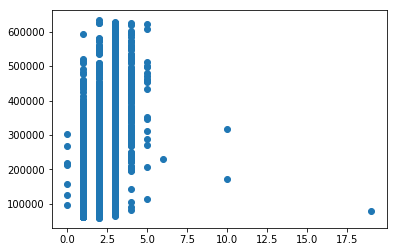

In [6]:
plt.scatter(data['Rooms'], data['Price']);

## split data

In [7]:
from sklearn.model_selection import train_test_split

In [8]:
train, valid = train_test_split(data, test_size=0.2, random_state=100)

## data clean

In [9]:
train.columns

Index(['Id', 'DistrictId', 'Rooms', 'Square', 'LifeSquare', 'KitchenSquare',
       'Floor', 'HouseFloor', 'HouseYear', 'Ecology_1', 'Ecology_2',
       'Ecology_3', 'Social_1', 'Social_2', 'Social_3', 'Healthcare_1',
       'Helthcare_2', 'Shops_1', 'Shops_2', 'Price'],
      dtype='object')

In [10]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8000 entries, 8369 to 5640
Data columns (total 20 columns):
Id               8000 non-null int64
DistrictId       8000 non-null int64
Rooms            8000 non-null float64
Square           8000 non-null float64
LifeSquare       6303 non-null float64
KitchenSquare    8000 non-null float64
Floor            8000 non-null int64
HouseFloor       8000 non-null float64
HouseYear        8000 non-null int64
Ecology_1        8000 non-null float64
Ecology_2        8000 non-null object
Ecology_3        8000 non-null object
Social_1         8000 non-null int64
Social_2         8000 non-null int64
Social_3         8000 non-null int64
Healthcare_1     4155 non-null float64
Helthcare_2      8000 non-null int64
Shops_1          8000 non-null int64
Shops_2          8000 non-null object
Price            8000 non-null float64
dtypes: float64(8), int64(9), object(3)
memory usage: 1.3+ MB


In [11]:
def rooms_clean(df: DF) -> DF:
    _median = train['Rooms'].median()
    df.loc[df['Rooms'] > 6, 'Rooms'] = _median
    df.loc[df['Rooms'] < 1, 'Rooms'] = _median
    return df

In [12]:
def square_clean(df: DF) -> DF:
    _median_square = train['Square'].median()
    _median__kitchen = train['KitchenSquare'].median()
    df.loc[df['Square'] < 15, 'Square'] = _median_square
    df.loc[df['Square'] > 250, 'Square'] = _median_square
    df.loc[df['KitchenSquare'] < df['Square']/10, 'KitchenSquare'] = _median__kitchen
    df.loc[df['KitchenSquare'] > df['Square']/2, 'KitchenSquare'] = _median__kitchen
    return df

In [13]:
def year_clean(df: DF) -> DF:
    df.loc[df['HouseYear'] > 2020, 'HouseYear'] = 2020
    return df

In [14]:
def floor_clean(df: DF) -> DF:
    df.loc[df['Floor'] > 48, 'Floor'] = train['Floor'].median()
    df.loc[df['HouseFloor'] > 48, 'HouseFloor'] = df['Floor']
    df.loc[df['HouseFloor'] == 0, 'HouseFloor'] = df['HouseFloor'].median()
    df.loc[df['HouseFloor'] < df['Floor'], 'HouseFloor'] = df['Floor']
    return df

## feature

In [15]:
def add_edge_floor(df: DF) -> DF:
    df['edge_floor'] = ((df['Floor'] == df['HouseFloor']) | (df['Floor'] == 1).astype(int))
    return df

In [16]:
def add_ecology_3(df: DF) -> DF:
    df['Ecology_3'] = (df['Ecology_3'] == 'B').astype(int)
    return df

In [17]:
def add_shops_2(df: DF) -> DF:
    df['Shops_2'] = (df['Shops_2'] == 'B').astype(int)
    return df

In [18]:
def data_clean(df: DF) -> DF:
    df = rooms_clean(df)
    df = square_clean(df)
    df = year_clean(df)
    df = floor_clean(df)
    df = add_ecology_3(df)
    df = add_shops_2(df)
    df = add_edge_floor(df)
    _feats = ['Ecology_1', 
         'Ecology_3', 
         'Social_1', 
         'Social_2', 
         'Social_3', 
         'Helthcare_2', 
         'Shops_1', 
         'Shops_2']
    for feat in _feats:
        df[f'{feat}^2'] = df[feat]** 2    
    return df

In [19]:
train = data_clean(train.copy())

In [20]:
train.loc[train['edge_floor'] == 1].head(20)

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2,Price,edge_floor,Ecology_1^2,Ecology_3^2,Social_1^2,Social_2^2,Social_3^2,Helthcare_2^2,Shops_1^2,Shops_2^2
8369,6004,27,2.0,67.020593,60.704574,6.0,9.0,9.0,1977,0.017647,B,1,2,469,0,NaN,0,0,1,188121.303704,True,3.114185e-04,1,4,219961,0,0,0,1
6950,4477,60,2.0,93.129688,59.276199,10.0,18.0,18.0,2005,0.007659,B,1,35,7077,56,2301.0,3,19,1,542945.918657,True,5.865285e-05,1,1225,50083929,3136,9,361,1
9226,10188,23,2.0,51.543365,NaN,6.0,3.0,3.0,1977,0.005767,B,1,1,388,0,NaN,0,0,1,86196.581698,True,3.326349e-05,1,1,150544,0,0,0,1
8929,10182,147,1.0,35.404279,21.173877,5.0,9.0,9.0,1968,0.319809,B,1,25,4756,16,2857.0,5,8,1,171546.400580,True,1.022780e-01,1,625,22619536,256,25,64,1
203,7985,62,3.0,88.491397,NaN,6.0,11.0,11.0,1977,0.072158,B,1,2,629,1,NaN,0,0,0,212527.426520,True,5.206716e-03,1,4,395641,1,0,0,0
786,14808,6,2.0,65.986604,65.362291,6.0,18.0,18.0,2014,0.243205,B,1,5,1564,0,540.0,0,0,1,192054.229594,True,5.914844e-02,1,25,2446096,0,0,0,1
4871,14268,6,2.0,65.276778,NaN,6.0,19.0,19.0,1977,0.243205,B,1,5,1564,0,540.0,0,0,1,168195.537094,True,5.914844e-02,1,25,2446096,0,0,0,1
9583,107,57,2.0,52.957023,30.840593,9.0,13.0,13.0,1979,0.133215,B,1,49,11395,3,1406.0,3,4,0,206874.916363,True,1.774632e-02,1,2401,129846025,9,9,16,0
4639,13523,23,1.0,52.787090,5.600609,6.0,7.0,7.0,2015,0.014073,B,1,2,475,0,NaN,0,0,1,104160.492175,True,1.980482e-04,1,4,225625,0,0,0,1
131,10726,27,3.0,89.692964,87.623814,6.0,13.0,13.0,1977,0.072158,B,1,2,629,1,NaN,0,0,0,265978.837780,True,5.206716e-03,1,4,395641,1,0,0,0


In [21]:
train.describe()

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_3,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2,Price,Ecology_1^2,Ecology_3^2,Social_1^2,Social_2^2,Social_3^2,Helthcare_2^2,Shops_1^2,Shops_2^2
count,8000.00000,8000.000000,8000.000000,8000.000000,6303.000000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,4155.000000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,8.000000e+03,8000.000000,8000.000000,8000.000000,8000.000000
mean,8400.09325,50.523500,1.885125,56.086985,37.357037,7.311625,8.528875,13.563000,1984.866875,0.119390,0.972500,24.676625,5354.534750,8.040625,1142.805535,1.323625,4.229375,0.917000,213605.830211,0.028431,0.972500,916.943625,4.483822e+07,635.474125,4.008125,41.106875,0.917000
std,4877.53892,43.435366,0.812103,18.755124,96.042528,2.228932,5.243553,5.783335,18.424782,0.119074,0.163545,17.551248,4021.094825,23.893385,1020.396815,1.502140,4.818938,0.275899,92269.463044,0.047125,0.163545,1069.635317,6.355771e+07,3178.742115,6.729615,93.181672,0.275899
min,0.00000,0.000000,1.000000,16.117154,0.370619,3.000000,1.000000,1.000000,1910.000000,0.000000,0.000000,0.000000,168.000000,0.000000,0.000000,0.000000,0.000000,0.000000,59174.778028,0.000000,0.000000,0.000000,2.822400e+04,0.000000,0.000000,0.000000,0.000000
25%,4144.75000,20.750000,1.000000,41.790121,22.710682,6.000000,4.000000,9.000000,1974.000000,0.017647,1.000000,6.000000,1564.000000,0.000000,350.000000,0.000000,1.000000,1.000000,153957.344640,0.000311,1.000000,36.000000,2.446096e+06,0.000000,0.000000,1.000000,1.000000
50%,8422.50000,37.000000,2.000000,52.298355,32.686509,6.000000,7.000000,14.000000,1977.000000,0.075779,1.000000,25.000000,5285.000000,2.000000,900.000000,1.000000,3.000000,1.000000,191419.419864,0.005742,1.000000,625.000000,2.793122e+07,4.000000,1.000000,9.000000,1.000000
75%,12656.25000,75.000000,2.000000,65.854539,45.064047,9.000000,12.000000,17.000000,2001.000000,0.195781,1.000000,36.000000,7227.000000,5.000000,1548.000000,2.000000,6.000000,1.000000,248571.509506,0.038330,1.000000,1296.000000,5.222953e+07,25.000000,4.000000,36.000000,1.000000
max,16798.00000,209.000000,5.000000,200.334539,7480.592129,32.000000,42.000000,48.000000,2020.000000,0.521867,1.000000,74.000000,19083.000000,141.000000,4849.000000,6.000000,23.000000,1.000000,633233.466570,0.272345,1.000000,5476.000000,3.641609e+08,19881.000000,36.000000,529.000000,1.000000


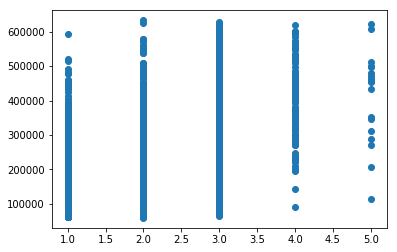

In [22]:
plt.scatter(train['Rooms'], train['Price']);

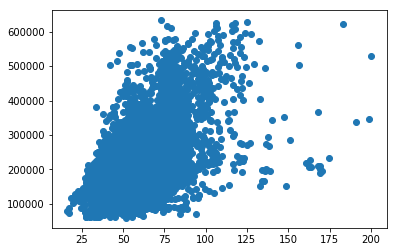

In [23]:
plt.scatter(train['Square'], train['Price']);

In [24]:
valid = data_clean(valid.copy())

In [25]:
valid.describe()

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_3,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2,Price,Ecology_1^2,Ecology_3^2,Social_1^2,Social_2^2,Social_3^2,Helthcare_2^2,Shops_1^2,Shops_2^2
count,2000.000000,2000.00000,2000.000000,2000.000000,1584.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.00000,1047.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2.000000e+03,2000.000000,2000.000000,2000.000000,2000.000000
mean,8316.665500,49.91000,1.903500,56.680954,36.573357,7.432500,8.518000,13.417500,1984.894500,0.116728,0.972500,24.728500,5342.648000,8.03350,1143.297039,1.303000,4.239000,0.919500,216270.966151,0.027741,0.972500,916.274500,4.413924e+07,620.754500,3.826000,40.585000,0.919500
std,4784.846384,44.19882,0.812107,19.621932,18.141881,2.626955,5.232816,5.783677,18.387153,0.118837,0.163576,17.462195,3950.082891,23.59016,1026.440820,1.459197,4.756805,0.272134,95239.155190,0.046684,0.163576,1033.127582,5.977992e+07,3090.672684,6.344277,91.167333,0.272134
min,38.000000,0.00000,1.000000,17.414181,1.049867,2.000000,1.000000,1.000000,1912.000000,0.000000,0.000000,0.000000,168.000000,0.00000,30.000000,0.000000,0.000000,0.000000,59877.592523,0.000000,0.000000,0.000000,2.822400e+04,0.000000,0.000000,0.000000,0.000000
25%,4256.500000,19.00000,1.000000,41.852540,23.016889,6.000000,4.000000,9.000000,1974.000000,0.017647,1.000000,6.000000,1564.000000,0.00000,370.000000,0.000000,1.000000,1.000000,153628.178419,0.000311,1.000000,36.000000,2.446096e+06,0.000000,0.000000,1.000000,1.000000
50%,8251.500000,33.50000,2.000000,53.427093,33.006708,6.000000,7.000000,14.000000,1977.000000,0.072158,1.000000,25.000000,5288.000000,2.00000,990.000000,1.000000,3.000000,1.000000,195466.433484,0.005207,1.000000,625.000000,2.796294e+07,4.000000,1.000000,9.000000,1.000000
75%,12363.250000,74.00000,3.000000,66.003708,45.223029,9.000000,12.000000,17.000000,2000.000000,0.194489,1.000000,36.000000,7425.000000,5.00000,1430.000000,2.000000,6.000000,1.000000,252763.593414,0.037826,1.000000,1296.000000,5.513062e+07,25.000000,4.000000,36.000000,1.000000
max,16796.000000,200.00000,6.000000,212.932361,211.231125,43.000000,32.000000,48.000000,2020.000000,0.521867,1.000000,74.000000,19083.000000,141.00000,4849.000000,6.000000,23.000000,1.000000,625820.041178,0.272345,1.000000,5476.000000,3.641609e+08,19881.000000,36.000000,529.000000,1.000000


In [26]:
test = data_clean(test)
test.describe()

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_3,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2,Ecology_1^2,Ecology_3^2,Social_1^2,Social_2^2,Social_3^2,Helthcare_2^2,Shops_1^2,Shops_2^2
count,5000.000000,5000.000000,5000.00000,5000.000000,3959.000000,5000.000000,5000.00000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,2623.000000,5000.00000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5.000000e+03,5000.000000,5000.000000,5000.000000,5000.000000
mean,8412.595400,51.279200,1.90780,56.543319,36.158810,7.304000,8.61780,13.473800,1984.392600,0.119874,0.970200,24.933800,5406.900000,8.262600,1146.657263,1.31940,4.242800,0.917600,0.028784,0.970200,929.011000,4.544495e+07,637.635800,3.930600,40.820000,0.917600
std,4832.674037,44.179466,0.81008,18.955437,17.825287,2.335953,5.39477,5.959129,18.573149,0.120070,0.170052,17.532202,4026.614773,23.863762,1044.744231,1.47994,4.777365,0.275001,0.047614,0.170052,1062.191603,6.351553e+07,3141.196272,6.473126,91.606364,0.275001
min,1.000000,0.000000,1.00000,16.319015,0.333490,2.000000,1.00000,1.000000,1908.000000,0.000000,0.000000,0.000000,168.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,2.822400e+04,0.000000,0.000000,0.000000,0.000000
25%,4221.750000,21.000000,1.00000,41.951045,23.092026,6.000000,4.00000,9.000000,1973.000000,0.019509,1.000000,6.000000,1564.000000,0.000000,325.000000,0.00000,1.000000,1.000000,0.000381,1.000000,36.000000,2.446096e+06,0.000000,0.000000,1.000000,1.000000
50%,8320.500000,37.000000,2.00000,52.921340,32.925087,6.000000,7.00000,14.000000,1977.000000,0.072158,1.000000,25.000000,5285.000000,2.000000,900.000000,1.00000,3.000000,1.000000,0.005207,1.000000,625.000000,2.793122e+07,4.000000,1.000000,9.000000,1.000000
75%,12598.250000,77.000000,2.00000,66.285129,45.174091,9.000000,12.00000,17.000000,2000.000000,0.195781,1.000000,36.000000,7287.000000,5.000000,1548.000000,2.00000,6.000000,1.000000,0.038330,1.000000,1296.000000,5.310037e+07,25.000000,4.000000,36.000000,1.000000
max,16795.000000,212.000000,6.00000,223.453689,303.071094,42.000000,46.00000,48.000000,2020.000000,0.521867,1.000000,74.000000,19083.000000,141.000000,4849.000000,6.00000,23.000000,1.000000,0.272345,1.000000,5476.000000,3.641609e+08,19881.000000,36.000000,529.000000,1.000000


## model

In [27]:
from sklearn.ensemble import RandomForestRegressor as RF

In [28]:
model = RF(n_estimators=333, max_depth=15, random_state=100, max_features=5, n_jobs=-1)

In [29]:
train.columns

Index(['Id', 'DistrictId', 'Rooms', 'Square', 'LifeSquare', 'KitchenSquare',
       'Floor', 'HouseFloor', 'HouseYear', 'Ecology_1', 'Ecology_2',
       'Ecology_3', 'Social_1', 'Social_2', 'Social_3', 'Healthcare_1',
       'Helthcare_2', 'Shops_1', 'Shops_2', 'Price', 'edge_floor',
       'Ecology_1^2', 'Ecology_3^2', 'Social_1^2', 'Social_2^2', 'Social_3^2',
       'Helthcare_2^2', 'Shops_1^2', 'Shops_2^2'],
      dtype='object')

In [30]:
feats = [
    'DistrictId', 
    'Square', 
    'KitchenSquare',
    'HouseFloor', 
    'HouseYear', 
    'Ecology_1', 
    'Ecology_3', 
    'Helthcare_2', 
    'Shops_1', 
    'Shops_2', 
    'Ecology_1^2',
    'Ecology_3^2', 
    'Social_1^2', 
    'Social_2^2', 
    'Social_3^2',
    'Helthcare_2^2', 
    'Shops_1^2', 
    'Shops_2^2',
    'edge_floor',
        ]

In [31]:
model.fit(train.loc[:, feats], train['Price'])

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=15,
           max_features=5, max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=333, n_jobs=-1, oob_score=False, random_state=100,
           verbose=0, warm_start=False)

In [32]:
DF({'feature': feats, 'importance':model.feature_importances_}).sort_values('importance')

,feature,importance
6,Ecology_3,0.000763
11,Ecology_3^2,0.000773
9,Shops_2,0.000928
17,Shops_2^2,0.001025
18,edge_floor,0.006811
15,Helthcare_2^2,0.018233
7,Helthcare_2,0.018768
8,Shops_1,0.022746
16,Shops_1^2,0.022930
10,Ecology_1^2,0.028266


In [33]:
from sklearn.metrics import r2_score as r2

In [34]:
def evaluate_model(df, model=model, feats=feats, check_r2=True) -> numpy.ndarray:
    prediction = model.predict(df.loc[:, feats])
    
    if check_r2:
        _r2 = r2(df['Price'], prediction)
        print(f'R2: {_r2}')
    return prediction

In [35]:
pred_train = evaluate_model(train)

R2: 0.9323644622183284


In [36]:
pred_valid = evaluate_model(valid)

R2: 0.7441131926873956


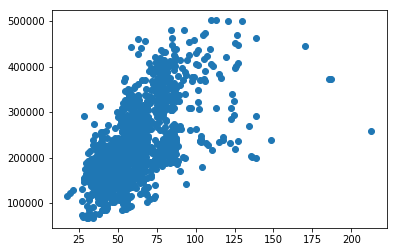

In [37]:
plt.scatter(valid['Square'], pred_valid);

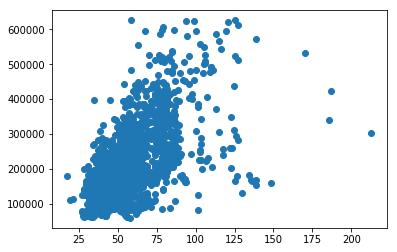

In [38]:
plt.scatter(valid['Square'], valid['Price']);

## Test

In [39]:
test['Price'] = evaluate_model(test, check_r2=False)

In [40]:
test.loc[:, ['Id', 'Price']].to_csv('ANekhamchin_prediction.csv', index=None)

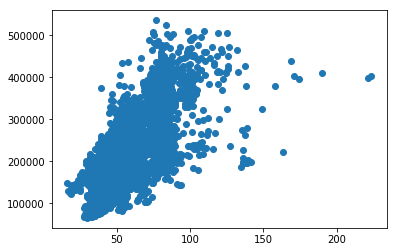

In [41]:
plt.scatter(test['Square'], test['Price']);